In [1]:
# installing the igraph package
install.packages("igraph")

# Loading the library
library(igraph)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [2]:
# Loading the list of packages and creating a Data Frame
nodes <- read.csv("/content/vertices.csv", header = TRUE)

# Loading the relationship between packages and creating a Data Frame
edges <- read.csv("/content/edges.csv", header = TRUE)

In [3]:
# Creating a directed graph using the nodes and edges
graph <- graph_from_data_frame(edges, vertices = nodes, directed = TRUE)

In [4]:
# Plotting the graph
png("/content/rplot.png", width = 4320, height = 4320)

plot(graph,
     vertex.color = "Lightblue",
     vertex.size = 1, # Adjust the vertex size
     vertex.label = NA, # Remove labels
     edge.width = 0.1, # Adjust the edge width
     edge.arrow.size = 0.1, # Adjust the arrow size
     layout = layout_on_sphere(graph) # Adding layout to make the graph clearer
)

dev.off()

png 
  2

In [ ]:
# Loading the list of top packages and creating a Data Frame
top_nodes <- read.csv("/content/top_vertices.csv", header = TRUE)

# Loading the relationship between top packages and creating a Data Frame
top_edges <- read.csv("/content/top_edges.csv", header = TRUE)

# Creating a directed graph using the top nodes and top edges
top_graph <- graph_from_data_frame(top_edges, vertices = top_nodes, directed = TRUE)

# Plotting the graph
png("/content/rplot_top.png", width = 2160, height = 2160)

plot(top_graph,
     vertex.color = "Lightblue",
     vertex.size = 4, # Adjust the vertex size
     vertex.label = NA, # Remove labels
     edge.width = 1, # Adjust the edge width
     edge.arrow.size = 1, # Adjust the arrow size
     layout = layout_on_sphere(top_graph) # Adding layout to make the graph clearer
)

dev.off()

png 
  2

In [4]:
# Printing the Number of Nodes
cat("Number of Nodes: ", vcount(graph), "\n")

# Printing the Number of Edges
cat("Number of Edges: ", ecount(graph), "\n")

Number of Nodes:  12050 
Number of Edges:  102279 


In [ ]:
# Calculating the density of the graph
edge_density(graph)

[1] 0.0007044472

In [5]:
# Calculating the in-degrees of the graph
deg.in <- degree(graph, mode = 'in')
nodes$deg.in <- deg.in
print(head(nodes[order(nodes$deg.in, decreasing = TRUE),],10))

        packages deg.in
8356       mocha   3588
9406      eslint   2845
11336 typescript   1720
1126    prettier   1468
5963        tape   1313
7024        chai   1262
9952         nyc   1043
694       rimraf    978
6570          xo    845
521         jest    784


In [ ]:
# Calculating the mean in-degree of the graph
mean(deg.in)

[1] 8.487884

In [ ]:
# Calculating the standard deviation of the in-degrees
sd(deg.in)

[1] 60.66979

In [6]:
# Plotting a histogram of the in-degrees
png('in-degree_hist.png', width = 480, height = 480)
hist(
  deg.in,
  xlab = "In-Degree",
  ylab = "Distribution",
  main = "",
  col = "lightblue",
)
dev.off()

png 
  2

In [ ]:
# Fit a power-law model using igraph's plfit function
pl_fit <- power.law.fit(nodes$deg.in)
print(pl_fit)

$continuous
[1] FALSE

$alpha
[1] 1.891324

$xmin
[1] 3

$logLik
[1] -13398.35

$KS.stat
[1] 0.01260073

$KS.p
[1] 0.5144118



In [7]:
# Calculating the out-degrees of the graph
deg.out <- degree(graph, mode = 'out')
nodes$deg.out <- deg.out
print(head(nodes[order(nodes$deg.out, decreasing = TRUE),],10))

                  packages deg.in deg.out
10580             testcafe      9     138
7061                  antd     13     137
3832             ember-cli    131     114
10531 ember-cli-addon-docs      3     103
8356                 mocha   3588      92
8248                  next      4      91
5112             prettierx      2      89
5912              rc-tools     10      89
8877       postcss-cssnext      2      89
4667        parcel-bundler      3      87


In [ ]:
# Calculating the mean out-degree of the graph
mean(deg.out)

[1] 8.487884

In [ ]:
# Calculating the standard deviation of the in-degrees
sd(deg.out)

[1] 9.868329

In [8]:
# Plotting a histogram of the out-degrees
png('out-degree_hist.png', width = 480, height = 480)
hist(
  deg.out,
  xlab = "Out-Degree",
  ylab = "Distribution",
  main = "",
  col = "lightblue",
  ylim = c(0,10000)
)
dev.off()

png 
  2

In [ ]:
# Fit a power-law model using igraph's plfit function
pl_fit <- power.law.fit(nodes$deg.out)
print(pl_fit)

$continuous
[1] FALSE

$alpha
[1] 3.578268

$xmin
[1] 22

$logLik
[1] -3481.865

$KS.stat
[1] 0.04760682

$KS.p
[1] 0.0222946



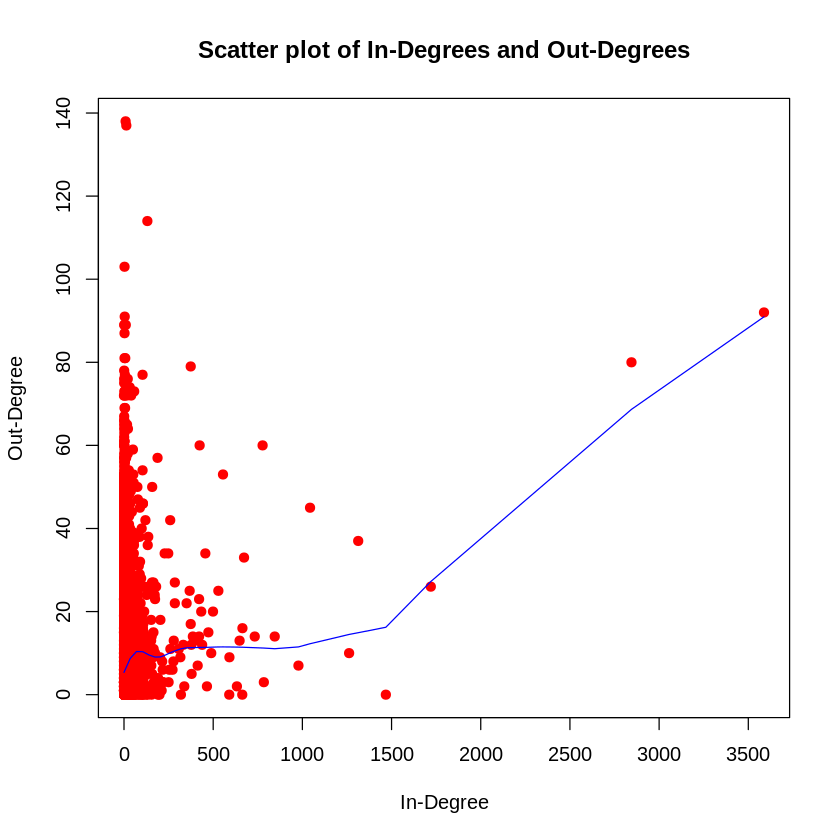

In [ ]:
# Plotting a scatter plot of the in-degrees and out-degrees
plot(
  deg.in,
  deg.out,
  main = "Scatter plot of In-Degrees and Out-Degrees", # Adding a title for the plot
  xlab = "In-Degree", # Adding a label for x
  ylab = "Out-Degree", # Adding a label for y
  pch = 19,
  col = "red" # Adjusting the color of the points
)


# Add fit lines
lines(lowess(deg.in, deg.out), col = "blue") # lowess line (x,y)

In [ ]:
# Xalculating the correlation of the in-degrees and out-degrees
cor(deg.in, deg.out)

[1] 0.1425553

In [ ]:
# Calculating the closeness centrality of the nodes
nodes$closeness <- harmonic_centrality(graph, mode = "out", normalized = TRUE)
print(head(nodes[order(nodes$closeness, decreasing = TRUE),], 10))

                          packages deg.in deg.out closeness
7061                          antd     13     137 0.2293254
10531         ember-cli-addon-docs      3     103 0.2229769
11686                     anyproxy      1      78 0.2214610
5912                      rc-tools     10      89 0.2152912
5577  mochawesome-report-generator      3      81 0.2144861
8356                         mocha   3588      92 0.2143849
194           sassdoc-theme-herman      2      72 0.2140116
9664                          dumi     40      72 0.2132877
5521                 react-toolbox      1      64 0.2125080
3832                     ember-cli    131     114 0.2124296


In [ ]:
# Calculating the closeness-centrality of the reversed graph
nodes$reversed.closeness <- harmonic_centrality(graph, mode = "in", normalized = TRUE)
print(head(nodes[order(nodes$reversed.closeness, decreasing = TRUE),], 10))

        packages deg.in deg.out closeness reversed.closeness
8356       mocha   3588      92 0.2143849          0.5494599
9406      eslint   2845      80 0.2060900          0.5334960
1126    prettier   1468       0 0.0000000          0.4423757
7024        chai   1262      10 0.1755165          0.4413146
11336 typescript   1720      26 0.1859365          0.4368095
9952         nyc   1043      45 0.1778239          0.4338750
694       rimraf    978       7 0.1590687          0.4304791
7350        glob    399      13 0.1697549          0.4202058
1715       sinon    529      25 0.1915221          0.4060172
4546   coveralls    648      13 0.1790527          0.4027548


In [ ]:
# Calculating the Eigen Vector centrality of the nodes
nodes$eigen.cent <- eigen_centrality(graph, directed = TRUE)$vector
print(head(nodes[order(nodes$eigen.cent, decreasing = TRUE),], 10))

        packages deg.in deg.out closeness reversed.closeness eigen.cent
9406      eslint   2845      80 0.2060900          0.5334960  1.0000000
8356       mocha   3588      92 0.2143849          0.5494599  0.9999071
9952         nyc   1043      45 0.1778239          0.4338750  0.6537881
7024        chai   1262      10 0.1755165          0.4413146  0.5464593
1126    prettier   1468       0 0.0000000          0.4423757  0.5453705
694       rimraf    978       7 0.1590687          0.4304791  0.5375645
11336 typescript   1720      26 0.1859365          0.4368095  0.5361054
7350        glob    399      13 0.1697549          0.4202058  0.4135320
1715       sinon    529      25 0.1915221          0.4060172  0.3998904
3852       husky    633       2 0.1598508          0.3865212  0.3560734


In [ ]:
# Calculating the betweenness centrality of the nodes
nodes$betweenness <- betweenness(graph, directed = TRUE)
print(head(nodes[order(nodes$betweenness, decreasing = TRUE),], 10))

                  packages deg.in deg.out closeness reversed.closeness
8356                 mocha   3588      92 0.2143849          0.5494599
9406                eslint   2845      80 0.2060900          0.5334960
5963                  tape   1313      37 0.1831587          0.3928079
2300               webpack    374      79 0.2042906          0.3814716
4726  karma-sauce-launcher     33       9 0.1791799          0.3305098
680                 rollup    555      53 0.2005376          0.3781271
11334         global-agent      1      24 0.1992453          0.2363456
11686             anyproxy      1      78 0.2214610          0.1849278
11398                memfs     41      28 0.1959229          0.3305932
7061                  antd     13     137 0.2293254          0.1566391
        eigen.cent betweenness
8356  9.999071e-01    43802652
9406  1.000000e+00    23163026
5963  2.025121e-01    10333324
2300  2.123077e-01     9140590
4726  8.378832e-02     9063381
680   2.258183e-01     8278072
11